In [1]:
import uproot4
import awkward1 as ak
import matplotlib.pyplot as plt
import numpy as np
from yahist import Hist1D
from yahist import Hist2D

import mplhep as hep
plt.style.use([hep.style.CMS])

#import pandas as pd

In [2]:
testfile = uproot4.open("/home/users/hmei/myWorkspace/CSCSoftware/CMSSW_10_6_8/src/test_cscntuple_0bias2018D.root")
testfile

<ReadOnlyDirectory '/' at 0x7f13402455e0>

In [3]:
tree = testfile['cscRootMaker/Events']
tree.keys()

['Run',
 'Event',
 'LumiSect',
 'BunchCrossing',
 'timeSecond',
 'vertex_nVertex',
 'recHits2D_nRecHits2D',
 'recHits2D_ID_endcap',
 'recHits2D_ID_ring',
 'recHits2D_ID_station',
 'recHits2D_ID_chamber',
 'recHits2D_ID_layer',
 'recHits2D_localX',
 'recHits2D_localY',
 'recHits2D_localXXerr',
 'recHits2D_localYYerr',
 'recHits2D_localXYerr',
 'recHits2D_stripPosition',
 'recHits2D_stripError',
 'recHits2D_SumQ',
 'recHits2D_SumQSides',
 'recHits2D_Time',
 'recHits2D_globalX',
 'recHits2D_globalY',
 'recHits2D_belongsToSaMuon',
 'recHits2D_belongsToMuon',
 'recHits2D_ID_chamberSerial',
 'recHits2D_ID_ringSerial',
 'recHits2D_simHit_particleTypeID',
 'recHits2D_simHit_localX',
 'recHits2D_simHit_localY',
 'recHits2D_ADCSignal',
 'recHits2D_nearestStrip',
 'recHits2D_nearestWire',
 'recHits2D_nearestWireGroup',
 'recHits2D_localStripWireIntersectionX',
 'recHits2D_localStripWireIntersectionY',
 'recHits2D_localStripWireGroupIntersectionX',
 'recHits2D_localStripWireGroupIntersectionY',
 '

### select chambers, according to has muon or not

In [4]:
events = tree.arrays(library="ak", how="zip")
events

<Array [{Run: 320570, Event: 7138152, ... ] type='2185 * {"Run": uint64, "Event"...'>

In [5]:
ak.to_list(events)[0]

{'Run': 320570,
 'Event': 7138152,
 'LumiSect': 13,
 'BunchCrossing': 1786,
 'timeSecond': 1533009928,
 'vertex_nVertex': 39,
 'recHits2D_nRecHits2D': 27,
 'cscSegments_nSegments': 5,
 'cscSegments_recHitRecord_endcap': [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
  [2.0, 2.0, 2.0, 2.0],
  [2.0, 2.0, 2.0, 2.0],
  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
  [2.0, 2.0, 2.0, 2.0]],
 'cscSegments_recHitRecord_ring': [[4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
  [4.0, 4.0, 4.0, 4.0],
  [4.0, 4.0, 4.0, 4.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0]],
 'cscSegments_recHitRecord_station': [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0]],
 'cscSegments_recHitRecord_chamber': [[19.0, 19.0, 19.0, 19.0, 19.0, 19.0],
  [21.0, 21.0, 21.0, 21.0],
  [21.0, 21.0, 21.0, 21.0],
  [13.0, 13.0, 13.0, 13.0, 13.0, 13.0],
  [14.0, 14.0, 14.0, 14.0]],
 'cscSegments_recHitRecord_layer': [[1.0, 6.0, 2.0, 3.0, 4.0, 5.0],
  [1.0, 2.0, 5.0, 6.

In [5]:
muon_keys = tree.keys(filter_name="muons_*")
muon_keys

['muons_nMuons',
 'muons_isPFMuon',
 'muons_isCaloMuon',
 'muons_isTrackerMuon',
 'muons_isStandAloneMuon',
 'muons_isGlobalMuon',
 'muons_numberOfChambers',
 'muons_numberOfSegments',
 'muons_numberOfMatches',
 'muons_isEnergyValid',
 'muons_calEnergyTower',
 'muons_calEnergyEm',
 'muons_calEnergyHad',
 'muons_charge',
 'muons_energy',
 'muons_px',
 'muons_py',
 'muons_pz',
 'muons_pt',
 'muons_et',
 'muons_p',
 'muons_phi',
 'muons_eta',
 'muons_theta',
 'muons_vx',
 'muons_vy',
 'muons_vz',
 'muons_globalTrackNormalizedChi2',
 'muons_globalTrackNumberOfValidMuonHits',
 'muons_trackNumberOfValidHits',
 'muons_trackNumberOfLostHits',
 'muons_isoNH03',
 'muons_isoCH03',
 'muons_isoPhot03',
 'muons_isoPU03',
 'muons_isoCH04',
 'muons_isoPhot04',
 'muons_isoNH04',
 'muons_isoPU04',
 'muons_dz',
 'muons_dxy',
 'muons_nRecHits',
 'muons_cscSegmentRecord_nRecHits',
 'muons_cscSegmentRecord_ring',
 'muons_cscSegmentRecord_station',
 'muons_cscSegmentRecord_chamber',
 'muons_cscSegmentRecord_

Text(0.5, 0, 'number of muon')

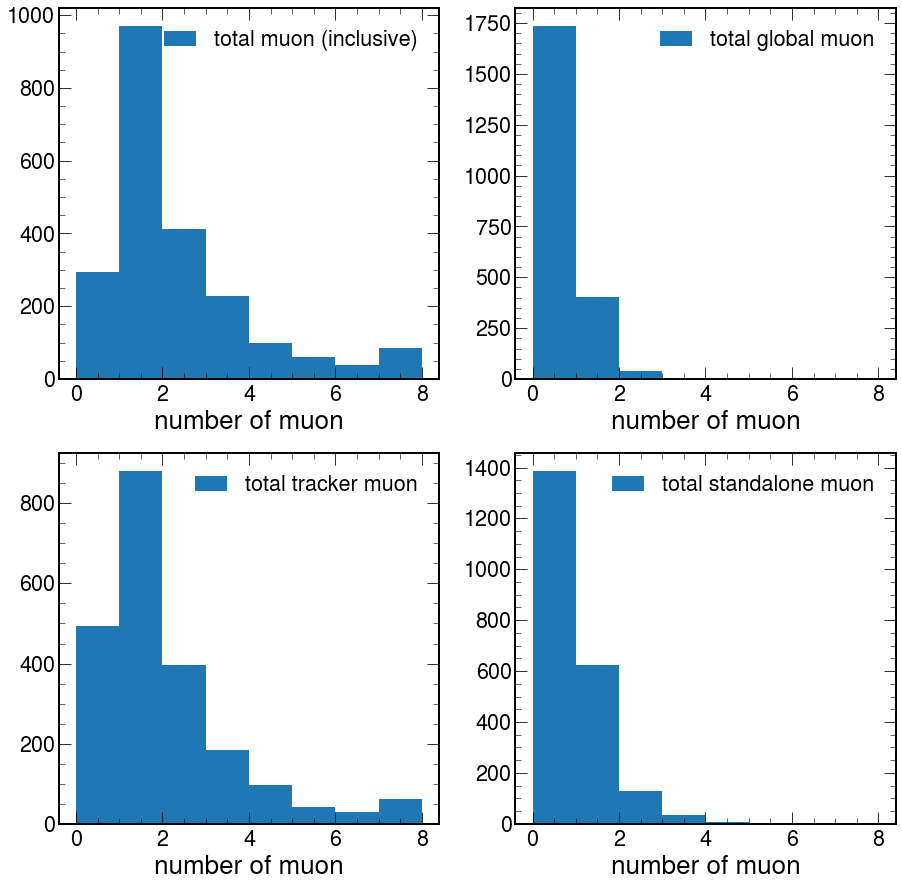

In [6]:
#plt.hist( events.muons_nMuons )
mucoll = tree.arrays(muon_keys, library="ak", how="zip") 
mucoll

mask_globalmu = mucoll.muons.isGlobalMuon
mask_trkmu = mucoll.muons.isTrackerMuon
mask_stdalonemu = mucoll.muons.isStandAloneMuon

np_nmu_tot = events.muons_nMuons  
np_nmu_global = ak.num(events.muons[mask_globalmu])
np_nmu_trk = ak.num(events.muons[mask_trkmu])
np_nmu_stdalone = ak.num(events.muons[mask_stdalonemu])

fignmu, axsnmu = plt.subplots(2,2, figsize=(15,15))
bins_nmu = np.linspace(0,8,9)
#
#np_nmu_global

h_nmu_tot = Hist1D(np.array(np_nmu_tot), bins=bins_nmu, label="total muon (inclusive)")
h_nmu_global = Hist1D(np.array(np_nmu_global), bins=bins_nmu, label="total global muon")
h_nmu_trk = Hist1D(np.array(np_nmu_trk), bins=bins_nmu, label="total tracker muon")
h_nmu_standalone = Hist1D(np.array(np_nmu_stdalone), bins=bins_nmu, label="total standalone muon")

h_nmu_tot.plot(axsnmu[0,0])
h_nmu_global.plot(ax=axsnmu[0,1])
h_nmu_trk.plot(ax=axsnmu[1,0])
h_nmu_standalone.plot(ax=axsnmu[1,1])

axsnmu[0,0].set_xlabel("number of muon") 
axsnmu[0,1].set_xlabel("number of muon") 
axsnmu[1,0].set_xlabel("number of muon") 
axsnmu[1,1].set_xlabel("number of muon") 

In [7]:
import numba as nb
from numba.typed import List

In [8]:
# return event index and rechit index
@nb.jit 
def muon_in_csc(mucoll):
    evt_sel = np.zeros((len(mucoll))) 
    for i in range(len(mucoll)):
        muons = mucoll[i].muons
        for muon in muons:
            if muon.numberOfSegments > 0:
                evt_sel[i] = 1 
                break
    return evt_sel 

In [9]:
#mucoll
%time
evt_list = List() 
np.sum(muon_in_csc(mucoll))

CPU times: user 9 µs, sys: 5 µs, total: 14 µs
Wall time: 27.9 µs


309.0

In [10]:
## two level of loop, one is looping over events, get index
## the other is looping over muon, get chamber ID


### get effective area of chamber


In [11]:
rh_keys = tree.keys(filter_name="recHits2D_*")
rhcoll = tree.arrays(rh_keys, library="ak", how="zip") 
rh_keys

['recHits2D_nRecHits2D',
 'recHits2D_ID_endcap',
 'recHits2D_ID_ring',
 'recHits2D_ID_station',
 'recHits2D_ID_chamber',
 'recHits2D_ID_layer',
 'recHits2D_localX',
 'recHits2D_localY',
 'recHits2D_localXXerr',
 'recHits2D_localYYerr',
 'recHits2D_localXYerr',
 'recHits2D_stripPosition',
 'recHits2D_stripError',
 'recHits2D_SumQ',
 'recHits2D_SumQSides',
 'recHits2D_Time',
 'recHits2D_globalX',
 'recHits2D_globalY',
 'recHits2D_belongsToSaMuon',
 'recHits2D_belongsToMuon',
 'recHits2D_ID_chamberSerial',
 'recHits2D_ID_ringSerial',
 'recHits2D_simHit_particleTypeID',
 'recHits2D_simHit_localX',
 'recHits2D_simHit_localY',
 'recHits2D_ADCSignal',
 'recHits2D_nearestStrip',
 'recHits2D_nearestWire',
 'recHits2D_nearestWireGroup',
 'recHits2D_localStripWireIntersectionX',
 'recHits2D_localStripWireIntersectionY',
 'recHits2D_localStripWireGroupIntersectionX',
 'recHits2D_localStripWireGroupIntersectionY',
 'recHits2D_stripWidthAtHit',
 'recHits2D_positionWithinStrip',
 'recHits2D_wireTime'

[Text(0.5, 1.0, 'station 1 ring 1'),
 Text(0.5, 1.0, 'station 1 ring 2'),
 Text(0.5, 1.0, 'station 1 ring 3'),
 Text(0.5, 1.0, 'station 1 ring 4'),
 Text(0.5, 1.0, 'station 2 ring 1'),
 Text(0.5, 1.0, 'station 2 ring 2'),
 Text(0.5, 1.0, 'station 3 ring 1'),
 Text(0.5, 1.0, 'station 3 ring 2'),
 Text(0.5, 1.0, 'station 4 ring 1'),
 Text(0.5, 1.0, 'station 4 ring 2')]

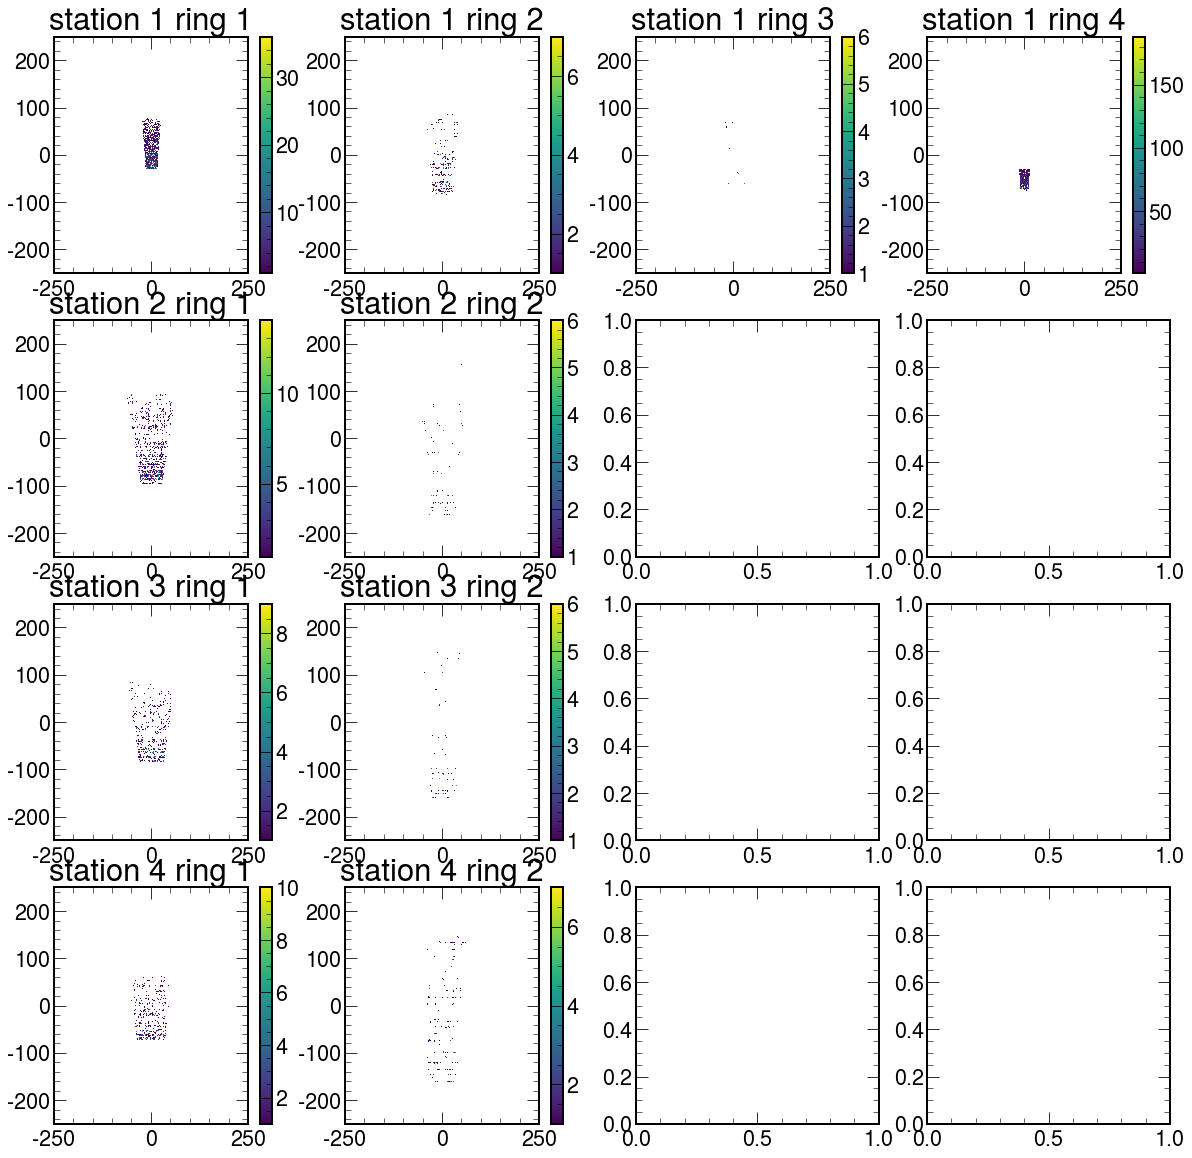

In [12]:
mask_station = [rhcoll.recHits2D.ID_station == i for i in range(1,5)]
mask_ring = [rhcoll.recHits2D.ID_ring == i for i in range(1,5)]
comb_s_r = [(1,1), (1,2), (1,3), (1,4), (2,1), (2,2), (3,1), (3,2), (4,1), (4,2)]
mask_chamberID = [ mask_station[c_[0]-1] & mask_ring[c_[1]-1] for c_ in comb_s_r ]

localx = [ ak.flatten(rhcoll.recHits2D.localX[mask_]) for mask_ in mask_chamberID]
localy = [ ak.flatten(rhcoll.recHits2D.localY[mask_]) for mask_ in mask_chamberID]

bin_localx = np.linspace(-250,250,500)
bin_localy = np.linspace(-250,250,500)
ak.to_numpy(localx[0])
hists_localxy = [ Hist2D(np.c_[ak.to_numpy(localx[i]), ak.to_numpy(localy[i])], bins=[bin_localx, bin_localy],
                        label="station " + str(comb_s_r[i][0]) + " ring " + str(comb_s_r[i][1]) ) for i in range(len(comb_s_r)) ]

figxy, axsxy = plt.subplots(4,4, figsize=(20,20))
[hists_localxy[i].plot(axsxy[comb_s_r[i][0]-1][comb_s_r[i][1]-1]) for i in range(len(comb_s_r))]
[axsxy[comb_s_r[i][0]-1][comb_s_r[i][1]-1].set_title("station " + str(comb_s_r[i][0]) + " ring " + str(comb_s_r[i][1])) for i in range(len(comb_s_r))]

In [13]:
[print (np.sum(hists_localxy[i]._counts)) for i in range(len(hists_localxy))]

11313.0
1571.0
117.0
17629.0
6478.0
538.0
3320.0
603.0
2714.0
1091.0


[None, None, None, None, None, None, None, None, None, None]